In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_excel("Anxiety.xlsx")
# remove spaces at the beginning/end of all column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())

print(df.head())
print(df.dtypes)


['1. Age', '2. Gender', '3. University', '4. Department', '5. Academic Year', '6. Current CGPA', '7. Scholarship', 'Academic_Anxiety_Level', 'Academic_Worry_Level', 'Relaxation_Difficulty_Level', 'Academic_Irritation_Level', 'Excessive_Worry_Level', 'Academic_Restlessness_Level', 'Fear_Level', 'Anxiety Value', 'Anxiety Label']
  1. Age 2. Gender                                      3. University  \
0  18-22    Female           Independent University, Bangladesh (IUB)   
1  18-22      Male           Independent University, Bangladesh (IUB)   
2  18-22      Male  American International University Bangladesh (...   
3  18-22      Male  American International University Bangladesh (...   
4  18-22      Male                       North South University (NSU)   

                                  4. Department           5. Academic Year  \
0  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
1  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent  

In [65]:
feature_cols = [
    'Academic_Anxiety_Level',
    'Academic_Worry_Level',
    'Relaxation_Difficulty_Level',
    'Academic_Irritation_Level',
    'Excessive_Worry_Level',
    'Academic_Restlessness_Level',
    'Fear_Level',
    'Anxiety Value'
]

X = df[feature_cols]
y = df['Anxiety Label']


In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [67]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifier
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)


In [68]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       1.00      1.00      1.00       152
 Minimal Anxiety       1.00      1.00      1.00        48
Moderate Anxiety       1.00      1.00      1.00       186
  Severe Anxiety       1.00      1.00      1.00       223

        accuracy                           1.00       609
       macro avg       1.00      1.00      1.00       609
    weighted avg       1.00      1.00      1.00       609


Confusion Matrix:
[[152   0   0   0]
 [  0  48   0   0]
 [  0   0 186   0]
 [  0   0   0 223]]


<Figure size 600x500 with 0 Axes>

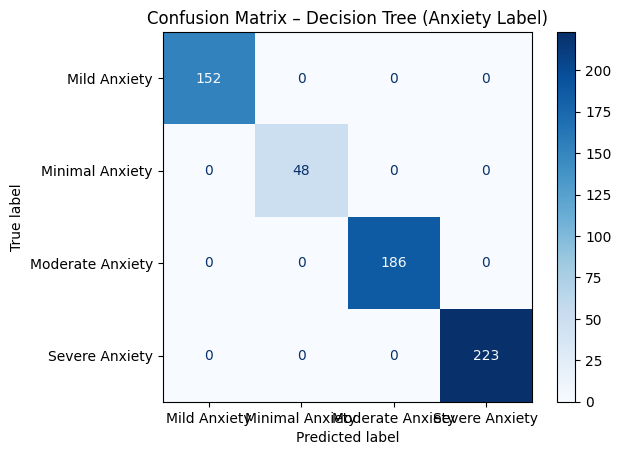

In [69]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix – Decision Tree (Anxiety Label)")
plt.show()


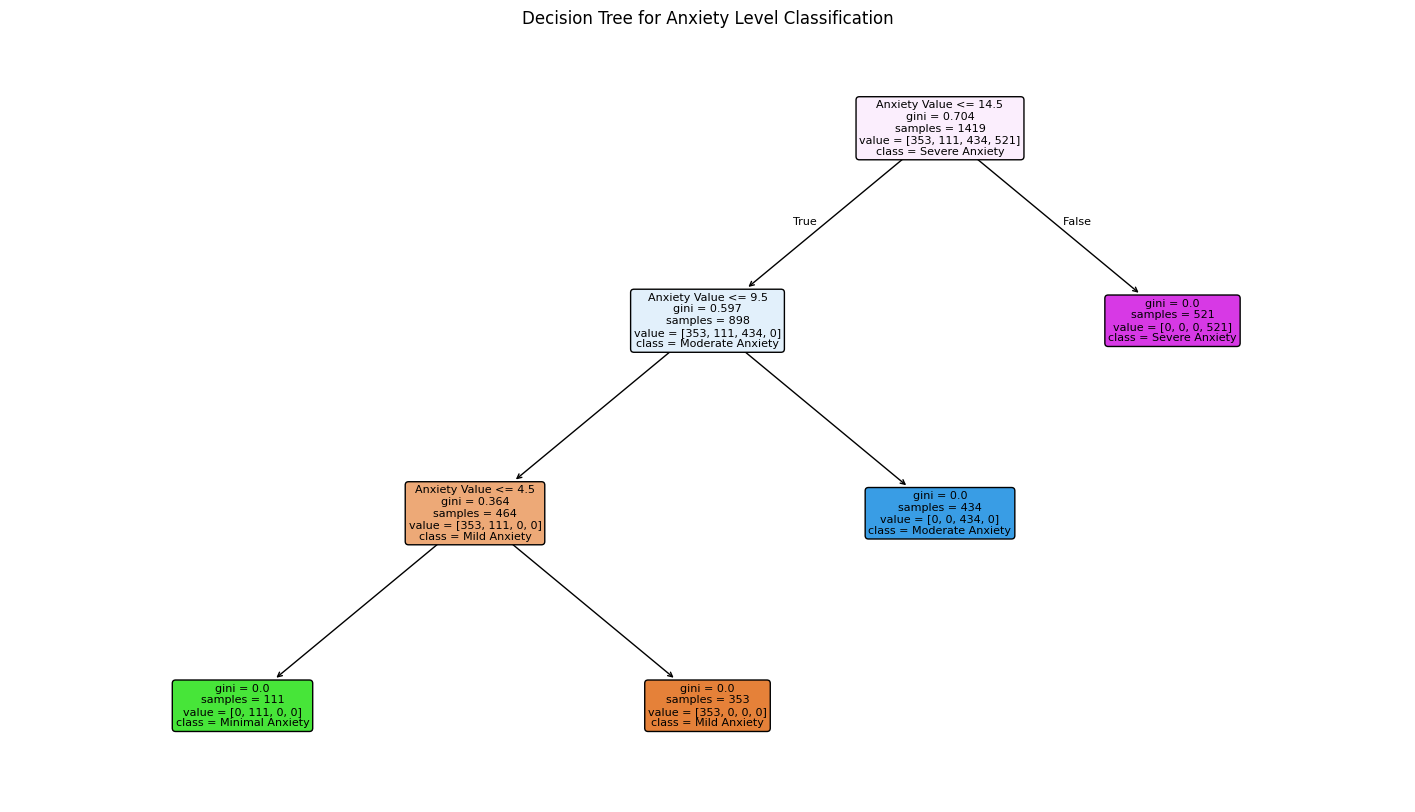

In [70]:
plt.figure(figsize=(18, 10))
tree.plot_tree(
    clf,
    feature_names=feature_cols,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Anxiety Level Classification")
plt.show()


In [71]:
filename = "decision_tree_anxiety_model.sav"
with open(filename, 'wb') as f:
    pickle.dump(clf, f)

print("Model saved as", filename)


Model saved as decision_tree_anxiety_model.sav


In [72]:
cluster_features = [
    'Academic_Anxiety_Level',
    'Academic_Worry_Level',
    'Relaxation_Difficulty_Level',
    'Academic_Irritation_Level',
    'Excessive_Worry_Level',
    'Academic_Restlessness_Level',
    'Fear_Level',
    'Anxiety Value'
]

X_cluster = df[cluster_features]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)


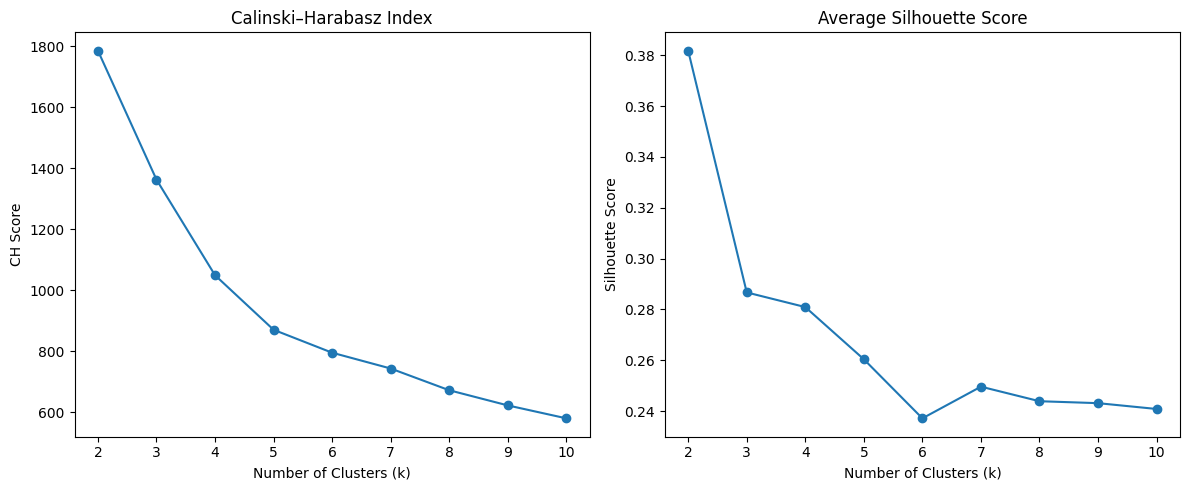

In [73]:
k_range = range(2, 11)
ch_scores = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    labels = kmeans.labels_

    ch = calinski_harabasz_score(X_cluster_scaled, labels)
    sil = silhouette_score(X_cluster_scaled, labels)

    ch_scores.append(ch)
    silhouette_scores.append(sil)

# Plot Calinski–Harabasz Index
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Calinski–Harabasz Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CH Score')

# Plot Average Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Average Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [74]:
# Choose k based on the previous plots (e.g., k = 4)
k_optimal = 4

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_final.fit(X_cluster_scaled)

df['Cluster'] = kmeans_final.labels_

print("Cluster centers (in scaled space):")
print(kmeans_final.cluster_centers_)

print("\nNumber of students in each cluster:")
print(df['Cluster'].value_counts())


Cluster centers (in scaled space):
[[ 7.49648156e-01 -1.11720902e+00  2.73987156e-01  8.25459848e-01
   7.98800052e-01  7.93309723e-01  7.69934267e-01  5.50047485e-01]
 [-9.29955786e-01 -7.64264198e-01 -8.39386858e-01 -9.42273071e-01
  -1.02022684e+00 -9.47948706e-01 -9.44884210e-01 -1.15751258e+00]
 [ 9.13059652e-01  1.09891422e+00  8.58419972e-01  9.31662269e-01
   9.56064359e-01  8.89257268e-01  9.18477049e-01  1.19161073e+00]
 [-4.20267775e-02  1.63004107e-01  4.89336598e-02 -6.74343085e-02
   8.03442899e-04 -1.49093731e-02 -3.69879874e-02  1.05617604e-02]]

Number of students in each cluster:
Cluster
1    662
3    630
2    553
0    183
Name: count, dtype: int64


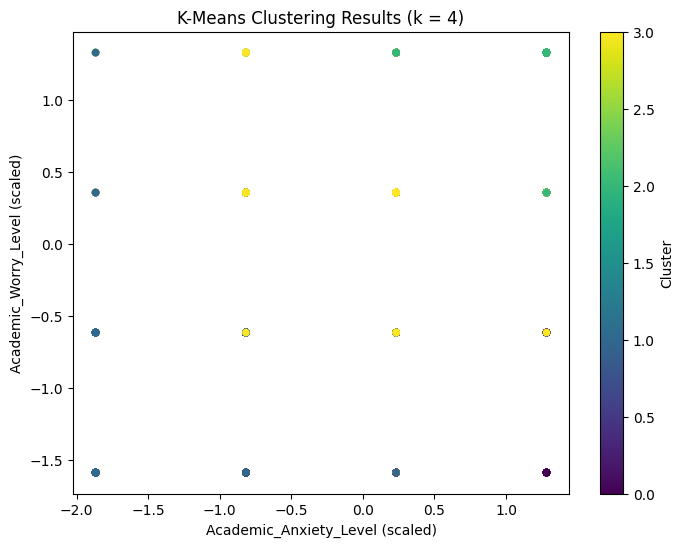

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_cluster_scaled[:, 0],  # Academic_Anxiety_Level (scaled)
    X_cluster_scaled[:, 1],  # Academic_Worry_Level (scaled)
    c=df['Cluster'],
    cmap='viridis',
    s=20
)
plt.xlabel('Academic_Anxiety_Level (scaled)')
plt.ylabel('Academic_Worry_Level (scaled)')
plt.title('K-Means Clustering Results (k = {})'.format(k_optimal))
plt.colorbar(label='Cluster')
plt.show()


In [76]:
cluster_model_file = "kmeans_anxiety_clusters.sav"
with open(cluster_model_file, 'wb') as f:
    pickle.dump(kmeans_final, f)

print("K-Means model saved as", cluster_model_file)


K-Means model saved as kmeans_anxiety_clusters.sav
